In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

2023-03-20 18:37:14.637529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [5]:
#y

In [3]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)
y.shape

(1000, 1)

In [6]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

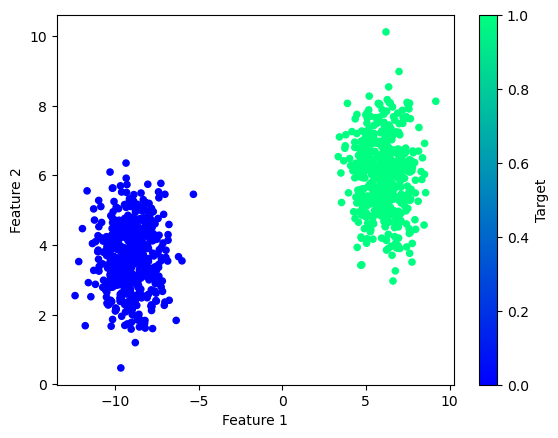

In [7]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [8]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:

# Create scaler instance
X_scaler = StandardScaler()

In [10]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [11]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Create a sequential model
neuron = Sequential()

2023-03-20 19:21:24.558673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# First layer
number_inputs = 2
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [14]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [15]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compiling a Neural Network Model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 1.0294 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9981 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9693 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9438 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9203 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8993 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8803 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8632 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8477 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss:

In [18]:
#Plotting Loss and Accuracy
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<AxesSubplot: >

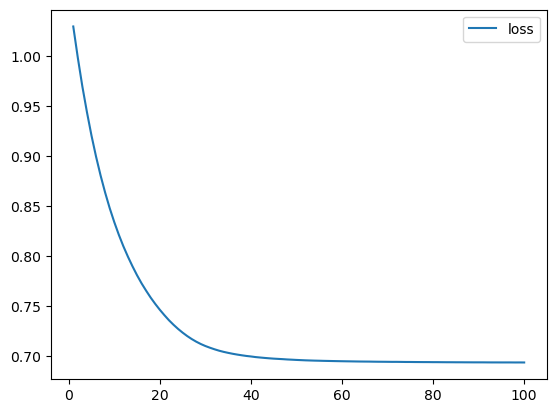

In [19]:
# Plot the loss
df.plot(y="loss")

<AxesSubplot: >

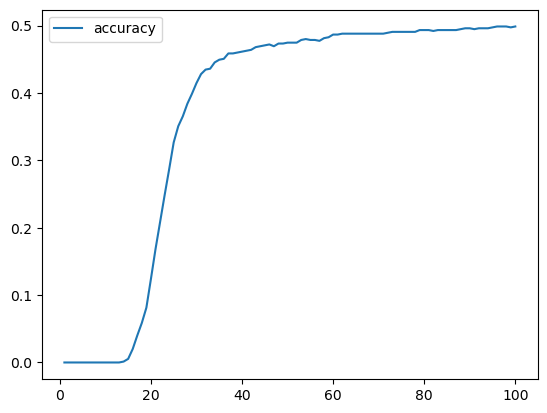

In [20]:
# Plot the accuracy
df.plot(y="accuracy")

In [21]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2) 

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6939 - accuracy: 0.4720 - 155ms/epoch - 19ms/step
Loss: 0.6939455270767212, Accuracy: 0.47200000286102295
